<a href="https://colab.research.google.com/github/Angi03/time_series/blob/main/2_Basics_Financial_econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Lecture 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive
#link collab to data
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# aul = pd.read_excel('AustraliaEmployedTotalPersons.xlsx',
#                    header = 0)

In [ ]:
aul = pd.read_excel('/content/drive/MyDrive/Fin econometrics/2_AustraliaEmployedTotalPersons.xlsx',
                   header=0 )

In [ ]:
aul

,yearandmonth,EmployedP
1978-02-28,1978-02-01,5985.659716
1978-03-31,1978-03-01,6040.560795
1978-04-30,1978-04-01,6054.213859
1978-05-31,1978-05-01,6038.264751
1978-06-30,1978-06-01,6031.342299
...,...,...
2018-07-31,2018-07-01,12572.476450
2018-08-31,2018-08-01,12544.050377
2018-09-30,2018-09-01,12611.208888
2018-10-31,2018-10-01,12652.024422


/tmp/ipython-input-1912485877.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Image saved to /content/drive/MyDrive/Fin econometrics/Employed_Persons_TimeSeries.png


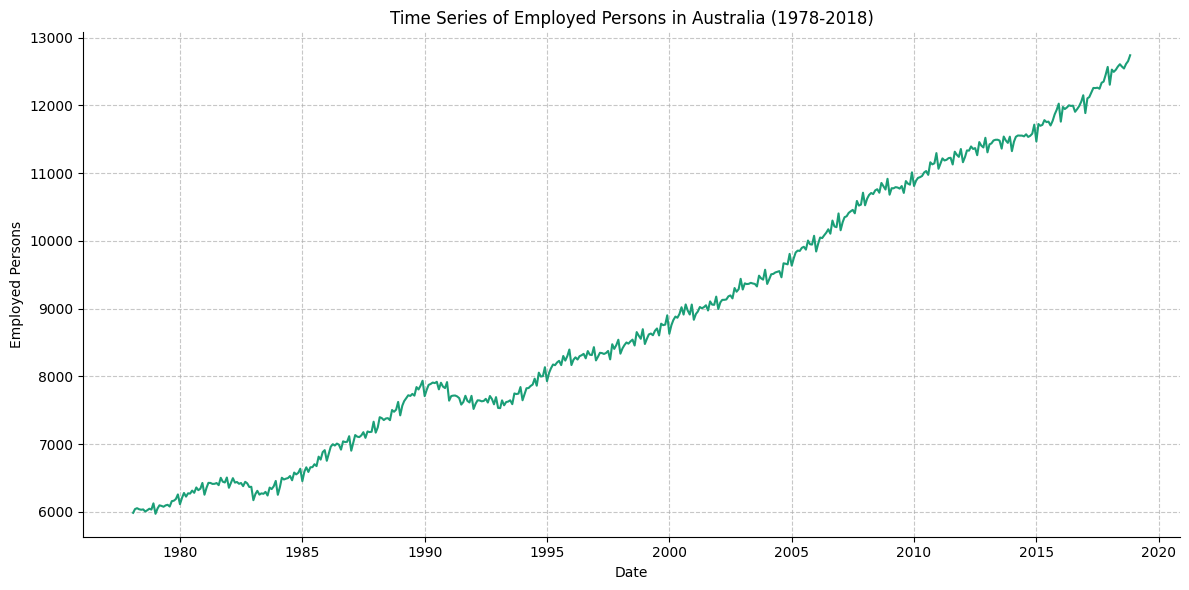

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
df_sorted = aul.sort_values('yearandmonth', ascending=True)
_plot_series(df_sorted, 'EmployedP')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Employed Persons')
plt.title('Time Series of Employed Persons in Australia (1978-2018)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the image in high resolution to Google Drive
save_path = '/content/drive/MyDrive/Fin econometrics/Employed_Persons_TimeSeries.png'
plt.savefig(save_path, dpi=300) # dpi=300 for high resolution
print(f"Image saved to {save_path}")

plt.show()

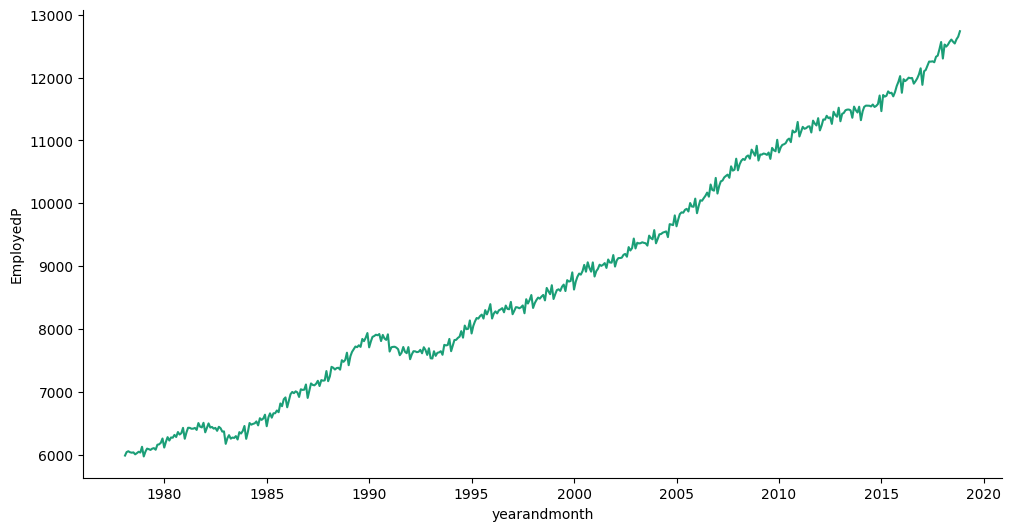

In [ ]:
# @title yearandmonth vs EmployedP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['yearandmonth']
  ys = series['EmployedP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = aul.sort_values('yearandmonth', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('yearandmonth')
_ = plt.ylabel('EmployedP')

/tmp/ipython-input-436460839.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  timeindex= pd.date_range('1978-02-01',


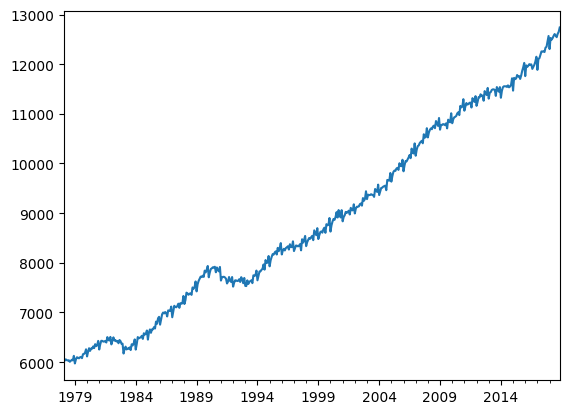

In [ ]:
timeindex= pd.date_range('1978-02-01',
                         periods = len(aul),
                         freq = 'M')
aul.index=timeindex
aults=aul['EmployedP']
aults.plot(); plt.show()

In [ ]:
aults

,EmployedP
1978-02-28,5985.659716
1978-03-31,6040.560795
1978-04-30,6054.213859
1978-05-31,6038.264751
1978-06-30,6031.342299
...,...
2018-07-31,12572.476450
2018-08-31,12544.050377
2018-09-30,12611.208888
2018-10-31,12652.024422


In [ ]:
type(aults)

pandas.core.series.Series

In [ ]:
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In practice, many of realistic time series possess **either deterministic seasonality (component)** or a **deterministic trend (component)**. **Some of them may have both**. We have observed several time series examples with a trend or/and seasonality. **After extracting the trend and seasonal components from a time series, the remainder is its random (variation) component**. Decomposing a time series is helpful to better understand it and improve forecast accuracy. In this section, we further discuss how to split a time series into their components. Knowing the background of a time series is helpful to find its components. For example, **in most cases, sales data possess deterministic seasonality, and macroeconomic time series have a deterministic trend.**

The deterministic trend (component) of a time series {Xt } should possess the
following features:

• It reflects systematic change in the time series and such change is relatively slow.

• It can be expressed by an aperiodic function of time T (t) = Tt .

The deterministic seasonality (component) of a time series {Xt } should have the
following features:

• It reflects systematic change in the time series.

• The seasonality is of a fixed frequency. The fixed frequency is usually called the (minimum) seasonal period.

• The movement pattern in one period is similar to the movement pattern in the next period. In other words, the seasonal effects are reasonably stable with respect to timing, direction, and magnitude.

**The seasonality is also known as the seasonal variation; seasonal effect; seasonal component**; and so forth. It tends to be caused by the changes of the calendar, the weather, the timing of decisions, and so on. Besides, in some literature, a component called the cycle is decomposed from a time series. In this bookwe combine the cycle with the trend (sometimes called trend-cycle component), and hence, there are at most three decomposable components in a time series.

There are two decomposition models used often in practice:

(1) the additive model Xt = Tt +St +Rt ;

(2) the multiplicativemodel Xt = TtStRt

where Tt , St, and Rt , respectively, denote the trend, seasonality, and random
component. As long as the movements in the time series are almost repetitive
from one period to another or the seasonal component St looks like a mathematical periodic function of time t , the two decomposition models fit well.

What is more, generally speaking, the additive decomposition model is more
appropriate if the magnitude of the seasonal variation does not vary with the
level of the time series. When the seasonal variation appears to be proportional
to the level of the time series, then the multiplicative decomposition model is
more appropriate. Note that the values in the time series data are required to be nonzero for the multiplicative decomposition model.

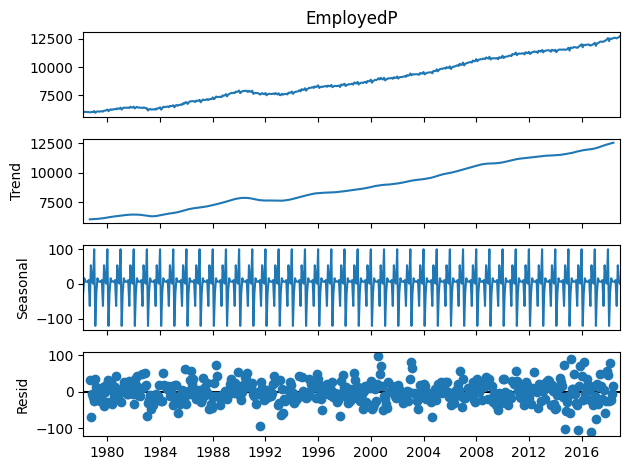

In [ ]:
aultsdeca=seasonal_decompose(aults, model='additive')
aultsdeca.plot(); plt.show()

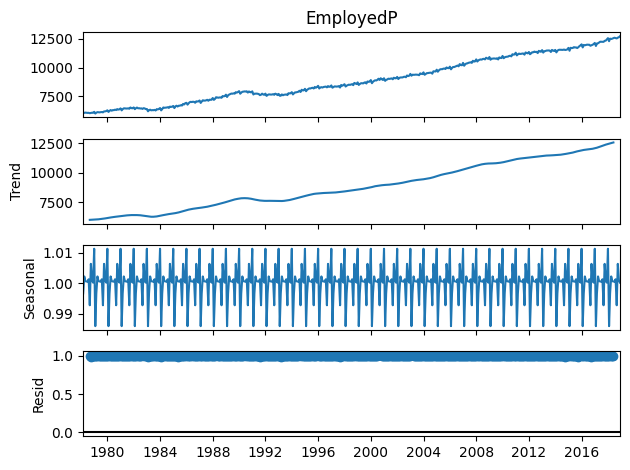

In [ ]:
aultsdeca=seasonal_decompose(aults, model='multiplicative')
aultsdeca.plot(); plt.show()

In [ ]:
t=np.arange(500)
type(t)
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

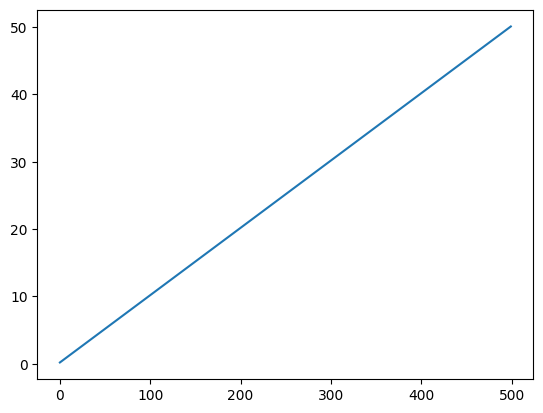

In [ ]:
f_t=0.2+0.1*t
f_t=pd.Series(f_t)
f_t.plot(); plt.show()

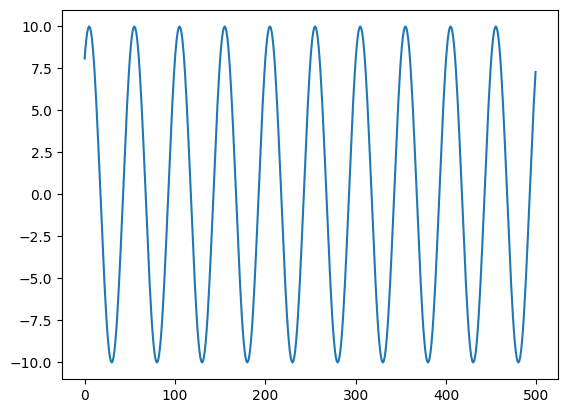

In [ ]:
p_t=10*np.sin(2*np.pi*t/50+0.3*np.pi)
p_t=pd.Series(p_t)
p_t.plot(); plt.show()

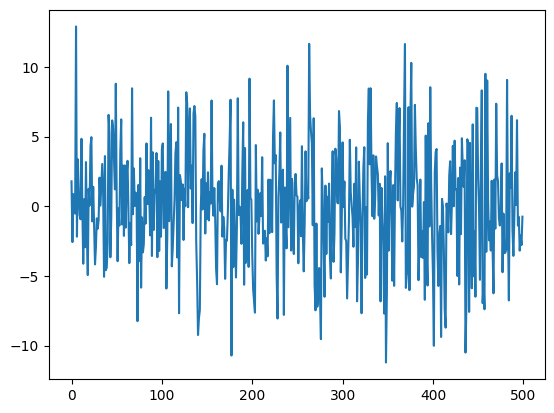

In [ ]:
np.random.seed(1357)
x_n=np.random.normal(loc=0, scale=4.2, size=500)
x_n=pd.Series(x_n)
x_n.plot(); plt.show()

In [ ]:
#trend=random
fx_n=f_t+x_n
#trend*random
fx=p_t*x_n
#cycle+random
px_n=p_t+x_n
#cycle*random
px=p_t*x_n

we first look at compositions of simple time series in this section. Given three very simple time series, we then compose them in different ways. Below is the three time series:

(1) **Ft = 0.2+0.1t **. It is obviously a linear increasing function. If a time series has one component such as Ft , then it possesses a deterministic trend component.

(2) **Pt = 2sin(2πt/50 + 0.3π)**. It is actually a periodic function with the period 50 or sine wave with the amplitude 2 and phase shift 0.3π. If a time series has one component such as Pt , then it possesses deterministic seasonality or deterministic seasonal component. But it is not necessary that the seasonal component is always a periodic function.

(3) **Xt = np.random.normal(loc=0,scale=4.2,size=500)**. It is a random real number series sampled from the normal distribution with mean zero and standard deviation 4.2. What is more, it is a Gaussian white noise Xt ∼ iidN(0,4.22). Any time series except deterministic series has a component like Xt or more complicated stochastic part, and this random component (part) is called random (stochastic) variation component.

These three time series plus addition (+) and multiplication (×) operations can
be combined in 14 different ways, including the combinations of only two time
series. All the compositions are as follows:

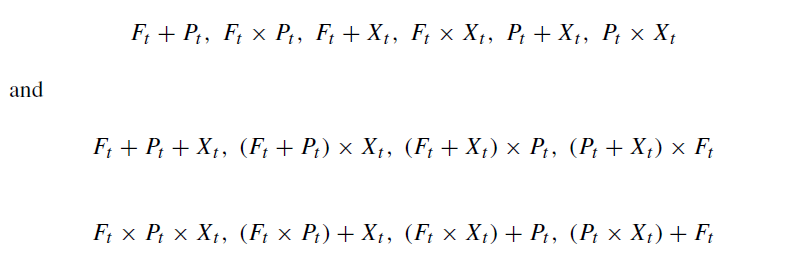

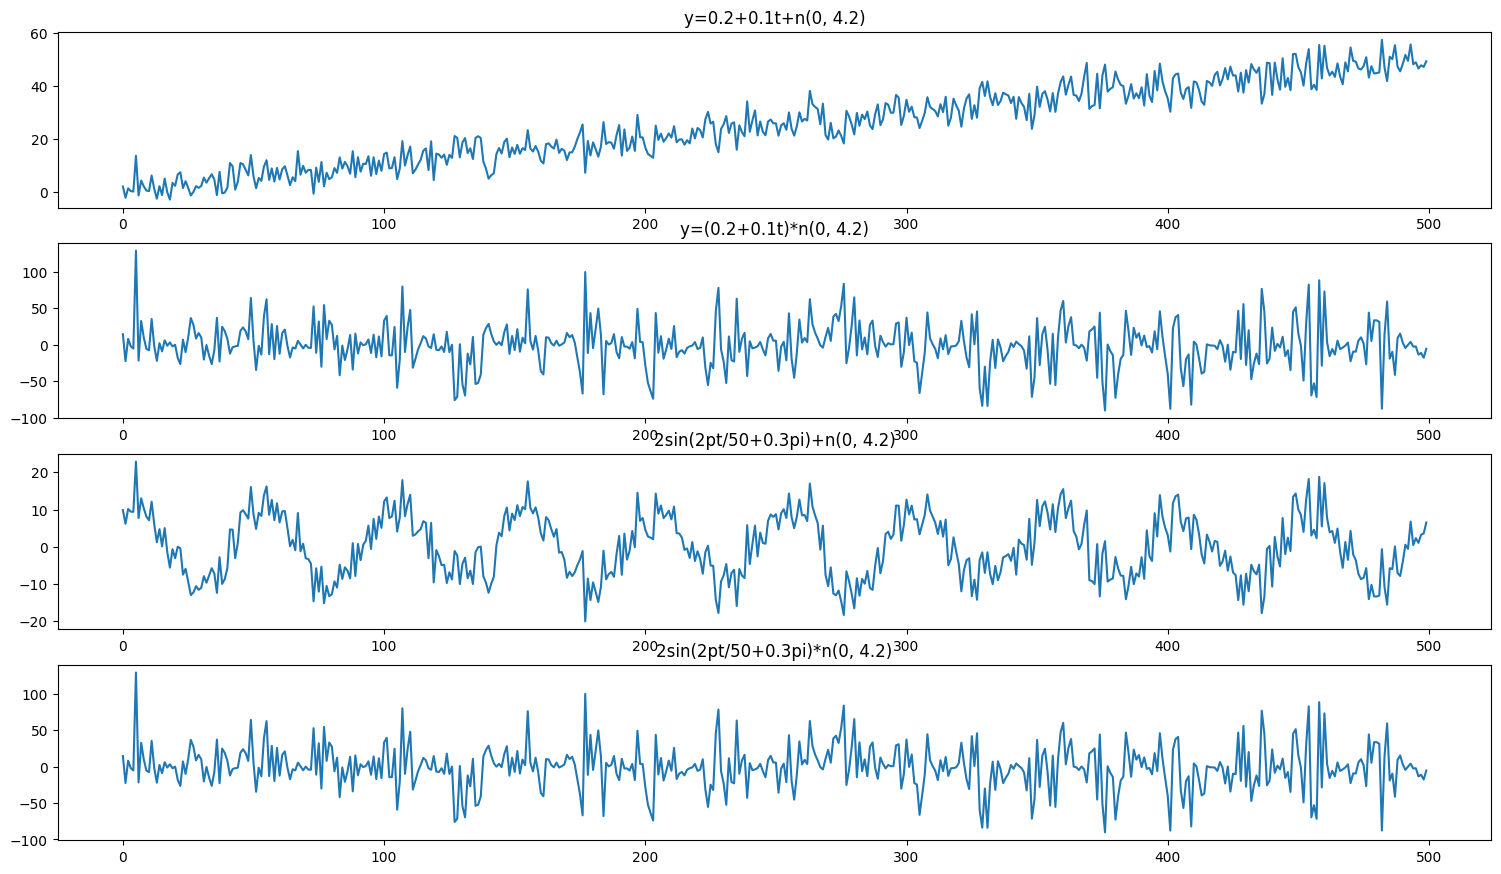

In [ ]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fx_n.plot(ax=fig.add_subplot(411))
plt.title('y=0.2+0.1t+n(0, 4.2)')
fx.plot(ax=fig.add_subplot(412))
plt.title('y=(0.2+0.1t)*n(0, 4.2)')
px_n.plot(ax=fig.add_subplot(413))
plt.title("2sin(2pt/50+0.3pi)+n(0, 4.2)")
px.plot(ax=fig.add_subplot(414))
plt.title("2sin(2pt/50+0.3pi)*n(0, 4.2)")
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

Stationarity test: One of the most important requirements for econometric modeling is that the time series data should be stationary, i.e., its mean and variance should remain constant over time. You can use the Augmented Dickey-Fuller (ADF) test to check for stationarity.

The ADF test returns the test statistic and p-value. You can interpret the results as follows:

If the p-value is less than 0.05, you can reject the null hypothesis of non-stationarity, and conclude that the time series is stationary.
If the p-value is greater than 0.05, you cannot reject the null hypothesis of non-stationarity, and conclude that the time series is non-stationary.

This line of code in Python uses the string formatting operator % to print a message that includes the value of a variable result[0].

The %f inside the string is a placeholder for a floating-point number, and it tells Python to format result[0] as a floating-point number and insert it in place of the %f in the string.

In [ ]:
result_adf=adfuller(aul['EmployedP'])
print("ADF statistics: %f" % result_adf[0])
print("p-value: %f" % result_adf[1])

ADF statistics: 1.335762
p-value: 0.996802


The KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test is a statistical test used to determine whether a time series is stationary or non-stationary. Stationarity is an important assumption in econometric modeling as it implies that the statistical properties of the time series remain constant over time. Non-stationary time series, on the other hand, exhibit trends, seasonal patterns, or other systematic variations that change over time.

The null hypothesis of the KPSS test is that the time series is stationary. The alternative hypothesis is that the time series is non-stationary. The test statistic is based on the cumulative sum of the deviations of the observed values from their expected values, under the null hypothesis of stationarity. The test statistic is compared to critical values to determine whether to reject or fail to reject the null hypothesis.

To perform the KPSS test in Python, you can use the statsmodels library. Here's an example code:

In [ ]:
result_kpss=kpss(aul['EmployedP'])
print("KPSS statistics: %f" % result_kpss[0])
print("p-value: %f" % result_kpss[1])

KPSS statistics: 3.821857
p-value: 0.010000


/tmp/ipython-input-1363134441.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss=kpss(aul['EmployedP'])


In [ ]:
aul['Log_EmployedP']=np.log(aul['EmployedP'])
aul

,yearandmonth,EmployedP,Log_EmployedP
1978-02-28,1978-02-01,5985.659716,8.697122
1978-03-31,1978-03-01,6040.560795,8.706252
1978-04-30,1978-04-01,6054.213859,8.708510
1978-05-31,1978-05-01,6038.264751,8.705872
1978-06-30,1978-06-01,6031.342299,8.704725
...,...,...,...
2018-07-31,2018-07-01,12572.476450,9.439265
2018-08-31,2018-08-01,12544.050377,9.437002
2018-09-30,2018-09-01,12611.208888,9.442341
2018-10-31,2018-10-01,12652.024422,9.445573


the logarithm time series is also nonstationary. We continue to take a new action.Let

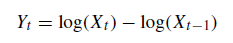

Now suppose that {Pt } is the closing price at time t for a certain financial product (e.g., stock, bond, futures, exchange rate, and so on). Evidently the return on this product is

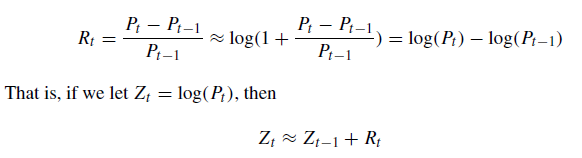

Notice that for the log function, we have log(1+x) ≈ x if x is small. Furthermore, the yield rate of a financial product is usually small. Hence

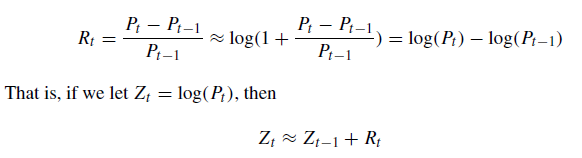

In finance, for mathematical convenience, we tend to use Zt − Zt−1 as the return on the financial product at time t (usually called the log return). In most cases, the return Rt behaves like a white noise and by the log price Zt like a random walk. It is why many financial economists use
the random walk as a key model for the log price of a financial asset.

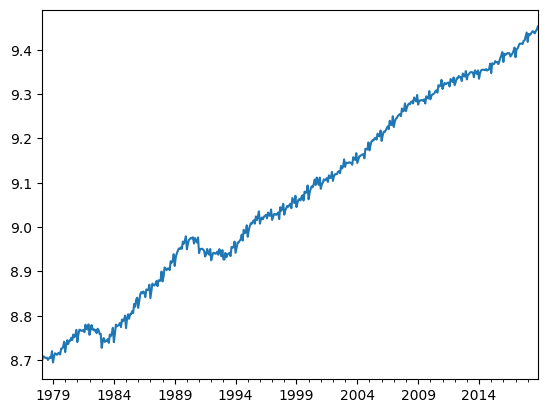

In [ ]:
aul['Log_EmployedP'].plot(); plt.show()

In [ ]:
aul['Dif_Log_EmployedP']=aul['Log_EmployedP'].diff(1)
aul
aul=aul.dropna()
aul

,yearandmonth,EmployedP,Log_EmployedP,Dif_Log_EmployedP
1978-03-31,1978-03-01,6040.560795,8.706252,0.009130
1978-04-30,1978-04-01,6054.213859,8.708510,0.002258
1978-05-31,1978-05-01,6038.264751,8.705872,-0.002638
1978-06-30,1978-06-01,6031.342299,8.704725,-0.001147
1978-07-31,1978-07-01,6036.083926,8.705511,0.000786
...,...,...,...,...
2018-07-31,2018-07-01,12572.476450,9.439265,-0.002723
2018-08-31,2018-08-01,12544.050377,9.437002,-0.002264
2018-09-30,2018-09-01,12611.208888,9.442341,0.005340
2018-10-31,2018-10-01,12652.024422,9.445573,0.003231


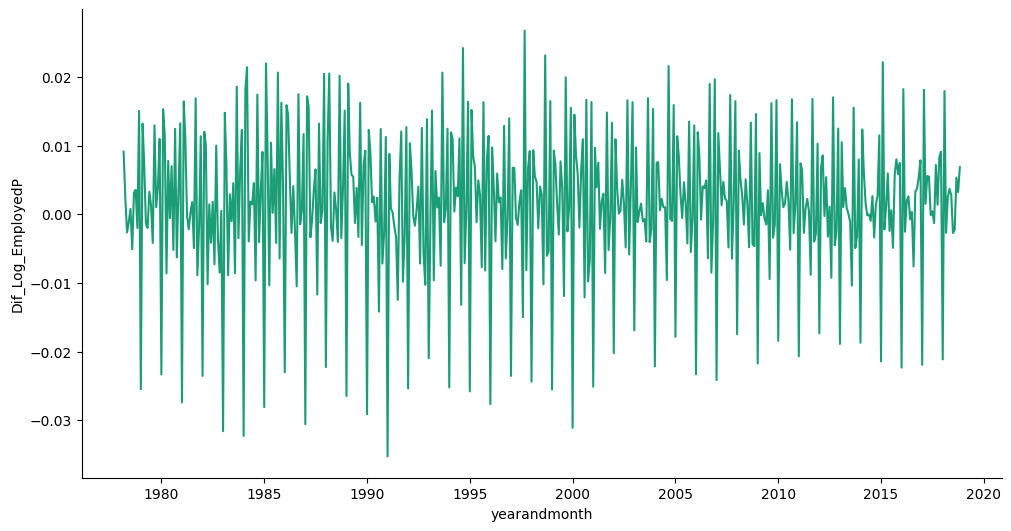

In [ ]:
# @title yearandmonth vs Dif_Log_EmployedP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['yearandmonth']
  ys = series['Dif_Log_EmployedP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = aul.sort_values('yearandmonth', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('yearandmonth')
_ = plt.ylabel('Dif_Log_EmployedP')

In [ ]:
result_adf2=adfuller(aul['Dif_Log_EmployedP'])
print("ADF statistics: %f" % result_adf2[0])
print("p-value: %f" % result_adf2[1])

ADF statistics: -5.093743
p-value: 0.000014


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

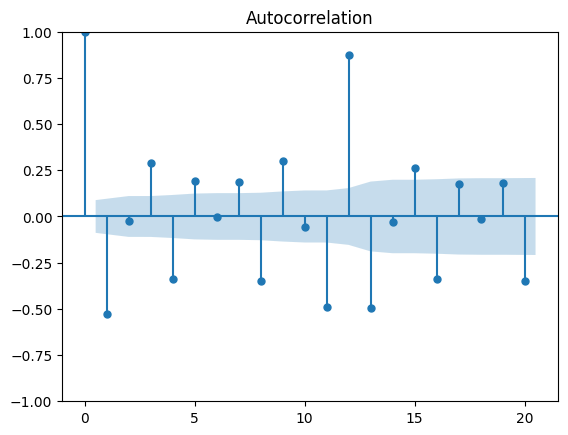

In [ ]:
acf_logdif=plot_acf(aul['Dif_Log_EmployedP'],
                               lags=20)

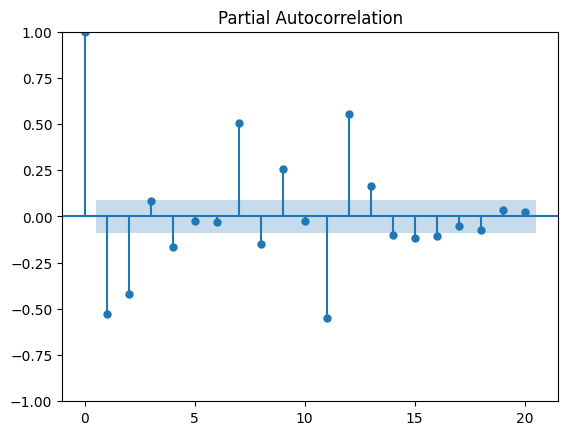

In [ ]:
pacf_logdif=plot_pacf(aul['Dif_Log_EmployedP'],
                               lags=20)